Notebook basé sur le laboratoire du cours de Machine Learning d'Andrew Ng sur Coursera

CRÉDIT : DeepLearning.AI https://www.deeplearning.ai/

## Objectifs
Dans ce laboratoire, vous allez :
- automatiser le processus d'optimisation de $w$ et $b$ en utilisant la descente de gradient (gradient descent).

## Outils
Dans ce TP, nous utiliserons :
- NumPy, une bibliothèque populaire pour le calcul scientifique
- Matplotlib, une bibliothèque populaire pour la visualisation de données
- des fonctions de tracé dans le fichier `lab_utils.py` dans le répertoire local

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

<a name="toc_40291_2"></a>
# Énoncé du problème

Utilisons les mêmes deux points de données qu'avant - une maison de 1000 pieds carrés vendue pour \\$300,000 et une maison de 2000 pieds carrés vendue pour \\$500,000.

| Taille (1000 pieds carrés) | Prix (milliers de dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [2]:
# Chargement de notre set de données
x_train = np.array([1.0, 2.0])   # caractéristiques
y_train = np.array([300.0, 500.0])   # valeur cible

<a name="toc_40291_2.0.1"></a>
### Compute_Cost
Ceci a été développé dans le dernier TP. Nous en aurons besoin à nouveau ici.

In [3]:
# Fonction pour calculer le coût
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

<a name="toc_40291_2.1"></a>
## Résumé de la descente de gradient
Jusqu'à présent dans ce cours, vous avez développé un modèle linéaire qui prédit $f_{w,b}(x^{(i)})$ :
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
En régression linéaire, vous utilisez des données d'entraînement en entrée pour ajuster les paramètres $w$,$b$ en minimisant une mesure de l'erreur entre nos prédictions $f_{w,b}(x^{(i)})$ et les données réelles $y^{(i)}$. Cette mesure est appelée le $coût$, $J(w,b)$. Lors de l'entraînement, vous mesurez le coût sur tous nos échantillons d'entraînement $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

Dans le cours, la *descente de gradient* a été décrite comme suit :

$$\begin{align*} \text{répéter}&\text{ jusqu'à convergence :} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
où, les paramètres $w$, $b$ sont mis à jour simultanément.  
Le gradient est défini comme suit :
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Ici, *simultanément* signifie que vous calculez les dérivées partielles pour tous les paramètres avant de mettre à jour l'un des paramètres.

<a name="toc_40291_2.2"></a>
## Implémenter la descente de gradient
Vous allez implémenter l'algorithme de descente de gradient pour une seule caractéristique. Vous aurez besoin de trois fonctions. 
- `compute_gradient` implémentant l'équation (4) et (5) ci-dessus
- `compute_cost` implémentant l'équation (2) ci-dessus (code du TP précédent)
- `gradient_descent`, utilisant compute_gradient et compute_cost

Conventions :
- Le nommage des variables python contenant des dérivées partielles suit ce modèle, $\frac{\partial J(w,b)}{\partial b}$ sera `dj_db`.
- w.r.t signifie par rapport à, comme dans la dérivée partielle de $J(wb)$ par rapport à $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
Écrivez dans la cellule ci-dessous une fonction `compute_gradient` qui implémente les équations (4) et (5) ci-dessus et qui renvoie $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. Les commentaires intégrés décrivent les opérations.

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Calcule le gradient pour la régression linéaire 
    Args:
      x (ndarray (m,)): Données, m exemples 
      y (ndarray (m,)): valeurs cibles
      w,b (scalaire)    : paramètres du modèle  
    Returns
      dj_dw (scalaire): Le gradient du coût par rapport aux paramètres w
      dj_db (scalaire): Le gradient du coût par rapport au paramètre b     
     """

Utilisons maintenant notre fonction `compute_gradient` pour trouver et tracer certaines dérivées partielles de notre fonction de coût par rapport à l'un des paramètres, $w_0$.


TypeError: cannot unpack non-iterable NoneType object

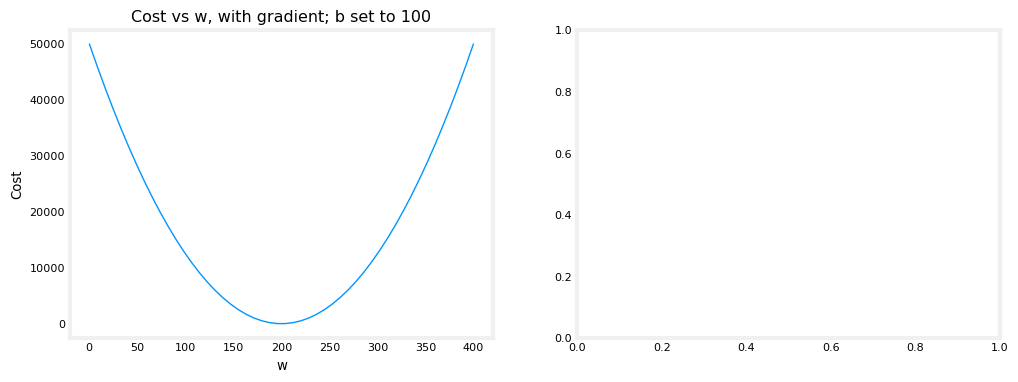

In [5]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Ci-dessus, le graphique de gauche montre $\frac{\partial J(w,b)}{\partial w}$ ou la pente de la courbe de coût par rapport à $w$ en trois points. Sur le côté droit du graphique, la dérivée est positive, tandis que sur la gauche, elle est négative. En raison de la forme "en bol", les dérivées conduiront toujours la descente de gradient vers le bas où le gradient est nul.

Le graphique de gauche a fixé $b=100$. La descente de gradient utilisera à la fois $\frac{\partial J(w,b)}{\partial w}$ et $\frac{\partial J(w,b)}{\partial b}$ pour mettre à jour les paramètres. Le 'quiver plot' sur la droite offre un moyen de visualiser le gradient des deux paramètres. La taille des flèches reflète l'ampleur du gradient à ce point. La direction et la pente de la flèche reflètent le rapport de $\frac{\partial J(w,b)}{\partial w}$ et $\frac{\partial J(w,b)}{\partial b}$ à ce point.
Notez que le gradient pointe *à l'opposé* du minimum. Revoir l'équation (3) ci-dessus. Le gradient mis à l'échelle est *soustrait* de la valeur actuelle de $w$ ou $b$. Cela déplace le paramètre dans une direction qui réduira le coût.

<a name="toc_40291_2.5"></a>
###  Descente de gradient
Maintenant que les gradients peuvent être calculés, la descente de gradient, décrite dans l'équation (3) ci-dessus, peut être mise en œuvre ci-dessous dans une fonction `gradient_descent`. Les détails de l'implémentation sont décrits dans les commentaires.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Effectue la descente de gradient pour ajuster w,b. Met à jour w,b en prenant 
    num_iters pas de gradient avec un taux d'apprentissage alpha
    
    Args:
      x (ndarray (m,))  : Données, m exemples 
      y (ndarray (m,))  : valeurs cibles
      w_in,b_in (scalaire): valeurs initiales des paramètres du modèle  
      alpha (float):     Taux d'apprentissage
      num_iters (int):   nombre d'itérations pour exécuter la descente de gradient
      cost_function:     fonction à appeler pour produire le coût
      gradient_function: fonction à appeler pour produire le gradient
      
    Returns:
      w (scalaire): Valeur mise à jour du paramètre après l'exécution de la descente de gradient
      b (scalaire): Valeur mise à jour du paramètre après l'exécution de la descente de gradient
      J_history (List): Historique des valeurs de coût
      p_history (list): Historique des paramètres [w,b] 
      """

Ci-dessous, vous utiliserez cette fonction pour trouver les valeurs optimales de $w$ et $b$ sur les données d'entraînement.

In [ ]:
# initialiser les paramètres
w_init = 0
b_init = 0
# quelques paramètres de descente de gradient
iterations = 10000
tmp_alpha = 1.0e-2
# exécuter la descente de gradient
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) trouvés par descente de gradient: ({w_final:8.4f},{b_final:8.4f})")

Prenez un moment et notez certaines caractéristiques du processus de descente de gradient affiché ci-dessus.

- Le coût commence grand et diminue rapidement comme décrit dans le matériel de cours.
- Les dérivées partielles, `dj_dw`, et `dj_db` deviennent également plus petites, rapidement au début puis plus lentement. Comme le montre le diagramme du cours, lorsque le processus se rapproche du 'fond du bol', le progrès est plus lent en raison de la plus petite valeur de la dérivée à ce point.
- le progrès ralentit bien que le taux d'apprentissage, alpha, reste fixe

### Coût versus itérations de la descente de gradient 
Un graphique du coût en fonction des itérations est une mesure utile de la progression de la descente de gradient. Le coût devrait toujours diminuer lors des exécutions réussies. Le changement de coût est si rapide initialement, qu'il est utile de tracer la descente initiale sur une échelle différente de la descente finale. Dans les graphiques ci-dessous, notez l'échelle du coût sur les axes et l'étape d'itération.

In [ ]:
# tracer le coût versus l'itération
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Coût vs. itération (début)");  ax2.set_title("Coût vs. itération (fin)")
ax1.set_ylabel('Coût')            ;  ax2.set_ylabel('Coût') 
ax1.set_xlabel('étape d\'itération')  ;  ax2.set_xlabel('étape d\'itération') 
plt.show()

### Prédictions
Maintenant que vous avez découvert les valeurs optimales pour les paramètres $w$ et $b$, vous pouvez maintenant utiliser le modèle pour prédire les valeurs des logements en fonction de nos paramètres appris. Comme prévu, les valeurs prédites sont presque les mêmes que les valeurs d'entraînement pour le même logement. De plus, la valeur non présente dans la prédiction est conforme à la valeur attendue.

In [ ]:
print(f"Prédiction pour une maison de 1000 pieds carrés {w_final*1.0 + b_final:0.1f} mille dollars")
print(f"Prédiction pour une maison de 1200 pieds carrés {w_final*1.2 + b_final:0.1f} mille dollars")
print(f"Prédiction pour une maison de 2000 pieds carrés {w_final*2.0 + b_final:0.1f} mille dollars")

<a name="toc_40291_2.6"></a>
## Tracé
Vous pouvez montrer la progression de la descente de gradient pendant son exécution en traçant le coût sur les itérations sur un tracé de contour du coût(w,b).

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Ci-dessus, le tracé de contour montre le $coût(w,b)$ sur une plage de $w$ et $b$. Les niveaux de coût sont représentés par les anneaux. Superposé, à l'aide de flèches rouges, se trouve le chemin de la descente de gradient. Voici quelques points à noter :
- Le chemin fait des progrès réguliers (monotones) vers son objectif.
- Les premiers pas sont beaucoup plus grands que les pas près de l'objectif.

**En zoomant**, nous pouvons voir les dernières étapes de la descente de gradient. Notez que la distance entre les étapes se réduit à mesure que le gradient approche de zéro.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

<a name="toc_40291_2.7.1"></a>
### Augmentation du taux d'apprentissage

Dans la conférence, il y a eu une discussion sur la valeur appropriée du taux d'apprentissage, $\alpha$ dans l'équation(3). Plus $\alpha$ est grand, plus la descente de gradient convergera rapidement vers une solution. Mais, s'il est trop grand, la descente de gradient divergera. Ci-dessus, vous avez un exemple de solution qui converge bien.

Essayons d'augmenter la valeur de $\alpha$ et voyons ce qui se passe :

In [ ]:
# initialiser les paramètres
w_init = 0
b_init = 0
# définir alpha à une grande valeur
iterations = 10
tmp_alpha = 8.0e-1
# exécuter la descente de gradient
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
                     

Ci-dessus, $w$ et $b$ oscillent entre des valeurs positives et négatives, la valeur absolue augmentant à chaque itération. De plus, à chaque itération $\frac{\partial J(w,b)}{\partial w}$ change de signe et le coût augmente plutôt que de diminuer. C'est un signe clair que le *taux d'apprentissage est trop grand* et que la solution diverge.
Visualisons cela avec un graphique.

In [ ]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Ci-dessus, le graphique de gauche montre la progression de $w$ lors des premières étapes de la descente de gradient. $w$ oscille de positif à négatif et le coût augmente rapidement. La descente de gradient opère simultanément sur $w$ et $b$, donc on a besoin du graphique 3D à droite pour avoir une image complète.

## Félicitations !
Dans ce TP, vous avez :
- approfondi les détails de la descente de gradient pour une seule variable.
- développé une fonction pour calculer le gradient
- visualisé ce qu'est le gradient
- complété une fonction de descente de gradient
- utilisé la descente de gradient pour trouver des paramètres
- examiné l'impact de la taille du taux d'apprentissage